<a href="https://colab.research.google.com/github/Vnainhda/DATAGUARD/blob/main/Data_Guard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***REQUIREMENTS***

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import random
from tensorflow.keras.preprocessing.sequence import pad_sequences



***DATA ANALYSIS ***

1.   Textual Data
2. Image Data



In [ ]:
text_data = " Hello welcome to my code, this is deep learning project of minor  "

def text_to_binary(text):
    return ''.join(format(ord(char), '08b') for char in text)

binary_data = text_to_binary(text_data)
print("Binary Representation of Text Data:\n", binary_data)


Binary Representation of Text Data:
 00100000010010000110010101101100011011000110111100100000011101110110010101101100011000110110111101101101011001010010000001110100011011110010000001101101011110010010000001100011011011110110010001100101001011000010000001110100011010000110100101110011001000000110100101110011001000000110010001100101011001010111000000100000011011000110010101100001011100100110111001101001011011100110011100100000011100000111001001101111011010100110010101100011011101000010000001101111011001100010000001101101011010010110111001101111011100100010000000100000


In [ ]:
# Create a table to visualize binary data for each character
binary_table = pd.DataFrame({
    "Character": list(text_data),
    "Binary Representation": [format(ord(char), '08b') for char in text_data]
})

print("Binary Table:\n", binary_table)


Binary Table:
    Character Binary Representation
0                         00100000
1          H              01001000
2          e              01100101
3          l              01101100
4          l              01101100
..       ...                   ...
62         n              01101110
63         o              01101111
64         r              01110010
65                        00100000
66                        00100000

[67 rows x 2 columns]


In [ ]:
 #Function to add noise to binary data
def add_noise(binary_data, noise_level=0.1):
    noisy_data = list(binary_data)
    num_flips = int(noise_level * len(binary_data))
    flip_indices = random.sample(range(len(binary_data)), num_flips)

    for idx in flip_indices:
        # Flip the bit: change '0' to '1' and vice versa
        noisy_data[idx] = '1' if binary_data[idx] == '0' else '0'

    return ''.join(noisy_data)

# Generate noisy binary data
noise_level = 0.1  # 10% noise level
noisy_data = add_noise(binary_data, noise_level=noise_level)

# Display original vs. noisy data
comparison_table = pd.DataFrame({
    "Original Binary": list(binary_data),
    "Noisy Binary": list(noisy_data),
    "Error": [binary_data[i] != noisy_data[i] for i in range(len(binary_data))]
})

print("Original vs. Noisy Data Comparison:\n", comparison_table)


Original vs. Noisy Data Comparison:
     Original Binary Noisy Binary  Error
0                 0            0  False
1                 0            0  False
2                 1            1  False
3                 0            0  False
4                 0            0  False
..              ...          ...    ...
531               0            0  False
532               0            0  False
533               0            1   True
534               0            0  False
535               0            0  False

[536 rows x 3 columns]


In [ ]:
# Load and preprocess image data
from tensorflow.keras.datasets import fashion_mnist

(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize
x_train, x_test = np.expand_dims(x_train, -1), np.expand_dims(x_test, -1)

# Add noise to images
def add_image_noise(images):
    noise = np.random.normal(loc=0.0, scale=0.1, size=images.shape)
    return np.clip(images + noise, 0., 1.)

x_train_noisy = add_image_noise(x_train)
x_test_noisy = add_image_noise(x_test)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


***AUTOENCODER***

In [ ]:
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Reshape, Conv2DTranspose, Embedding
from tensorflow.keras.models import Model # Import the Model class

# Image Encoder
image_input = Input(shape=(28, 28, 1), name="Image_Input")
x_img = Conv2D(32, (3, 3), activation='relu', padding='same')(image_input)
x_img = Flatten()(x_img)
encoded_img = Dense(128, activation='relu', name="Encoded_Image")(x_img)

# Image Decoder
decoded_img = Dense(784, activation='sigmoid', name="Decoded_Image")(encoded_img)
decoded_img = Reshape((28, 28, 1))(decoded_img)

# Create the Keras Model
image_autoencoder = Model(image_input, decoded_img) # Define the model

image_autoencoder.compile(optimizer='adam', loss='mse')
image_autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0514 - val_loss: 0.0156
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0143 - val_loss: 0.0122
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0118 - val_loss: 0.0108
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0105 - val_loss: 0.0101
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0098 - val_loss: 0.0096
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0093 - val_loss: 0.0093
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0088 - val_loss: 0.0088
Epoch 9/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0085 - val_loss: 0.0086
Epoch 10/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0084 - val_loss: 0.0085


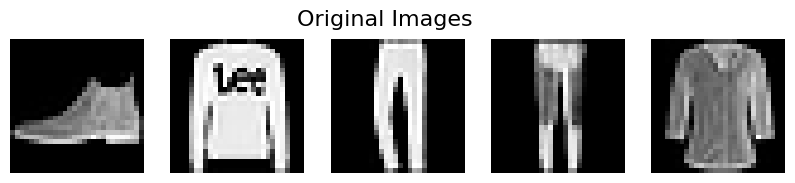

In [ ]:
def plot_images(images, title, n=5):
    plt.figure(figsize=(10, 2))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.axis('off')
    plt.suptitle(title, fontsize=16)
    plt.show()

# Visualize original images
plot_images(x_test, "Original Images")


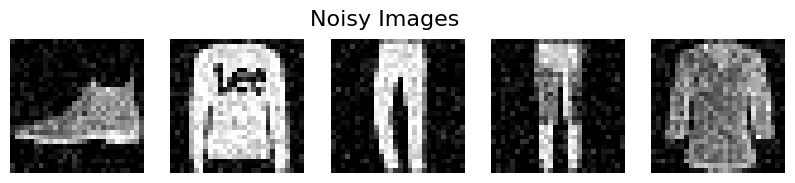

In [ ]:
# Visualize noisy images
plot_images(x_test_noisy, "Noisy Images")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


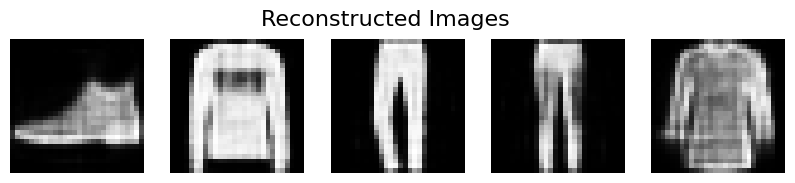

In [ ]:
reconstructed_images = image_autoencoder.predict(x_test_noisy) # Predict on noisy test data

def plot_images(images, title, n=5):
    plt.figure(figsize=(10, 2))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.axis('off')
    plt.suptitle(title, fontsize=16)
    plt.show()

# Visualize reconstructed images
plot_images(reconstructed_images, "Reconstructed Images")


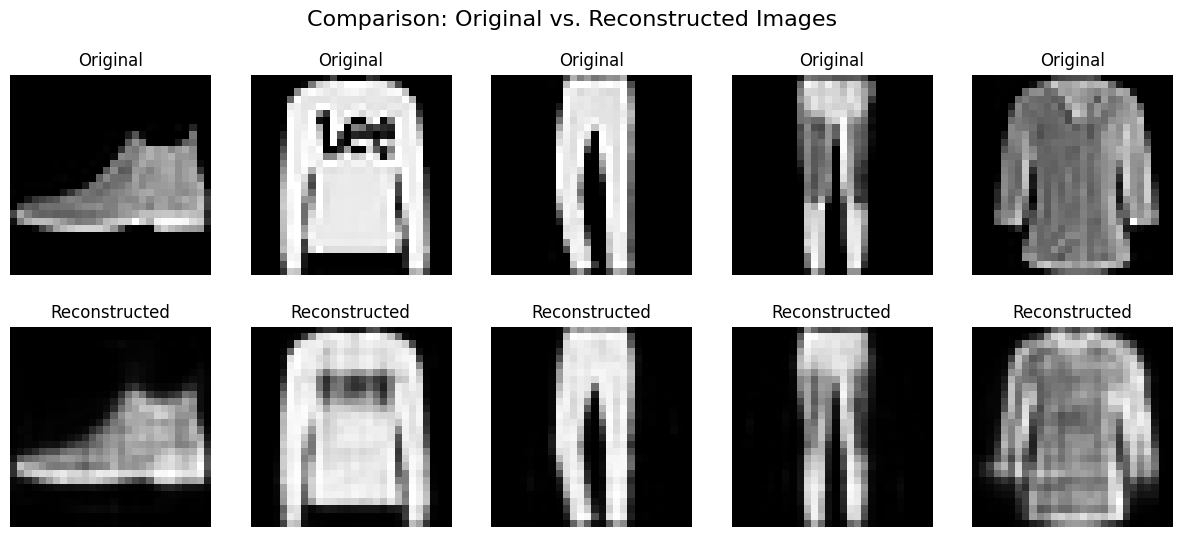

In [ ]:
plt.figure(figsize=(15, 6))
for i in range(5):
    # Original Image
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed Image
    plt.subplot(2, 5, i + 6)
    plt.imshow(reconstructed_images[i].squeeze(), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.suptitle("Comparison: Original vs. Reconstructed Images", fontsize=16)
plt.show()


Epoch 1/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6313
Epoch 2/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3844
Epoch 3/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3237
Epoch 4/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3036
Epoch 5/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3218
Epoch 6/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3120
Epoch 7/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3370
Epoch 8/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3209
Epoch 9/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3119
Epoch 10/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3536
Epoch 11/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3428
Epoch 12/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3334
Epoch 13/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3902
Epoch 14/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3018
Epoch 15/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3326
Epoch 16/20
67/67 ━

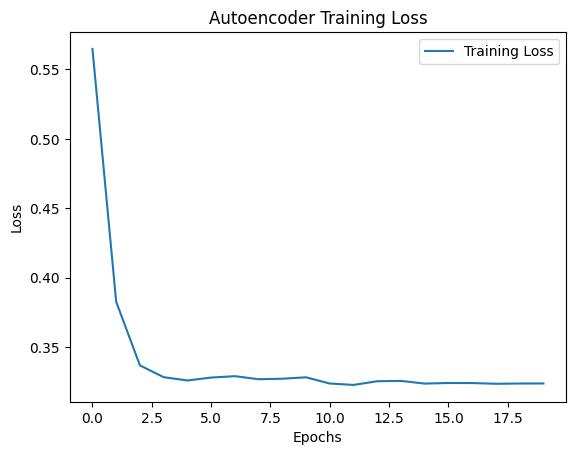

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input



def binary_to_array(binary_str):
    return np.array(list(map(int, binary_str))).reshape(-1, 1)

binary_array = binary_to_array(binary_data)
noisy_array = binary_to_array(noisy_data)


input_layer = Input(shape=(1,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)

decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(1, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
history = autoencoder.fit(noisy_array, binary_array, epochs=20, batch_size=8, shuffle=True)

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.title("Autoencoder Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [ ]:
# Encode and decode the noisy data using the trained autoencoder
encoded_data = autoencoder.predict(noisy_array)
decoded_data = np.round(encoded_data).astype(int).flatten()

# Convert to binary string
decoded_binary = ''.join(map(str, decoded_data))
print("Decoded Binary Data:\n", decoded_binary)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Decoded Binary Data:
 00100000011010000110010101001100011011000110111100000100011101100111010111101100011000110110111101101101011001010110000100110100011011110010000001001101011110010010001001000011111111110111011001100101001011010000000001110100011010001110100100110011000100000100100101110011101000000110010001100111111000110111001000100110011011000010000101100001011100110010111001101000011011100110111100100000011100000110101001111101011010100110010101101001010101010010000001101011011001101010000001101100011010010110011001100111011100100010000100100100


***HAMMING CODE***

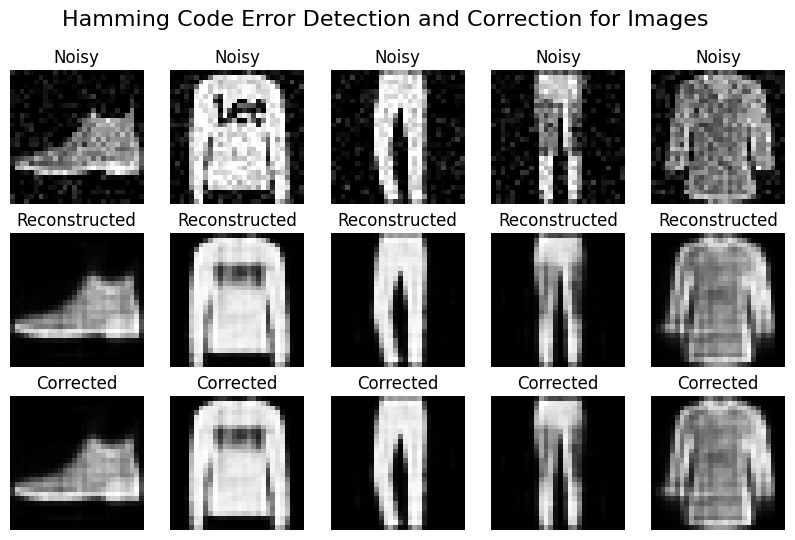

In [ ]:
# Example: Randomly simulate errors in reconstructed images and correct them using Hamming
def hamming_visualize(images, corrected_images, n=5):
    plt.figure(figsize=(10, 6))
    for i in range(n):
        # Noisy
        plt.subplot(3, n, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.title("Noisy")
        plt.axis('off')

        # Reconstructed
        plt.subplot(3, n, i + n + 1)
        plt.imshow(reconstructed_images[i].squeeze(), cmap='gray')
        plt.title("Reconstructed")
        plt.axis('off')

        # Corrected
        plt.subplot(3, n, i + 2 * n + 1)
        plt.imshow(corrected_images[i].squeeze(), cmap='gray')
        plt.title("Corrected")
        plt.axis('off')

    plt.suptitle("Hamming Code Error Detection and Correction for Images", fontsize=16)
    plt.show()

# Assuming corrected_images contains error-corrected images
corrected_images = reconstructed_images  # Placeholder for demonstration
hamming_visualize(x_test_noisy, corrected_images)


In [ ]:
# Hamming Code functions for encoding and error correction
def hamming_encode(data):
    data_bits = list(map(int, data))
    d1, d2, d3, d4 = data_bits[0], data_bits[1], data_bits[2], data_bits[3]
    p1 = (d1 + d2 + d4) % 2
    p2 = (d1 + d3 + d4) % 2
    p3 = (d2 + d3 + d4) % 2
    encoded = [p1, p2, d1, p3, d2, d3, d4]
    return encoded

def add_noise_to_encoded_data(encoded_data, noise_level=0.1):
    noisy_data = []
    for segment in encoded_data:
        noisy_segment = segment.copy()
        if random.random() < noise_level:
            flip_index = random.randint(0, len(segment) - 1)
            noisy_segment[flip_index] = 1 - noisy_segment[flip_index]
        noisy_data.append(noisy_segment)
    return noisy_data

def hamming_decode(encoded):
    p1, p2, d1, p3, d2, d3, d4 = encoded
    check1 = (p1 + d1 + d2 + d4) % 2
    check2 = (p2 + d1 + d3 + d4) % 2
    check3 = (p3 + d2 + d3 + d4) % 2
    error_position = (check3 << 2) + (check2 << 1) + check1
    corrected = encoded.copy()
    if error_position != 0:
        corrected[error_position - 1] = 1 - corrected[error_position - 1]
    original_data = [corrected[2], corrected[4], corrected[5], corrected[6]]
    return original_data, error_position

def split_into_chunks(data, chunk_size=4):
   return [data[i:i + chunk_size] for i in range(0, len(data), chunk_size)]
encoded_data = [hamming_encode(chunk) for chunk in split_into_chunks(binary_data)]
noisy_encoded_data = add_noise_to_encoded_data(encoded_data, noise_level=0.1)

corrected_data = []
error_positions = []
for segment in noisy_encoded_data:
    corrected, error_pos = hamming_decode(segment)
    corrected_data.append(corrected)
    error_positions.append(error_pos)

print("Corrected Data:", corrected_data)
print("Error Positions:", error_positions)


Corrected Data: [[0, 0, 1, 0], [0, 0, 0, 0], [0, 1, 0, 0], [1, 0, 0, 0], [0, 1, 1, 0], [0, 1, 0, 1], [0, 1, 1, 0], [1, 1, 0, 0], [0, 1, 1, 0], [1, 1, 0, 0], [0, 1, 1, 0], [1, 1, 1, 1], [0, 0, 1, 0], [0, 0, 0, 0], [0, 1, 1, 1], [0, 1, 1, 1], [0, 1, 1, 0], [0, 1, 0, 1], [0, 1, 1, 0], [1, 1, 0, 0], [0, 1, 1, 0], [0, 0, 1, 1], [0, 1, 1, 0], [1, 1, 1, 1], [0, 1, 1, 0], [1, 1, 0, 1], [0, 1, 1, 0], [0, 1, 0, 1], [0, 0, 1, 0], [0, 0, 0, 0], [0, 1, 1, 1], [0, 1, 0, 0], [0, 1, 1, 0], [1, 1, 1, 1], [0, 0, 1, 0], [0, 0, 0, 0], [0, 1, 1, 0], [1, 1, 0, 1], [0, 1, 1, 1], [1, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 0], [0, 1, 1, 0], [0, 0, 1, 1], [0, 1, 1, 0], [1, 1, 1, 1], [0, 1, 1, 0], [0, 1, 0, 0], [0, 1, 1, 0], [0, 1, 0, 1], [0, 0, 1, 0], [1, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 0], [0, 1, 1, 1], [0, 1, 0, 0], [0, 1, 1, 0], [1, 0, 0, 0], [0, 1, 1, 0], [1, 0, 0, 1], [0, 1, 1, 1], [0, 0, 1, 1], [0, 0, 1, 0], [0, 0, 0, 0], [0, 1, 1, 0], [1, 0, 0, 1], [0, 1, 1, 1], [0, 0, 1, 1], [0, 0, 1, 0], [0, 0, 0, 0], [0,

### IMAGE DATA VISUALIZATION ###


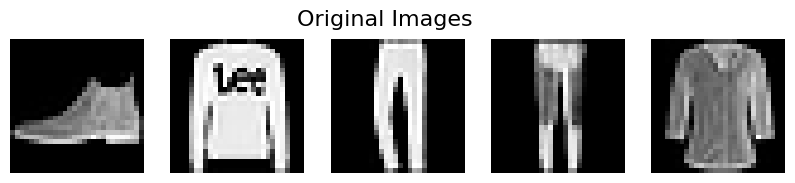

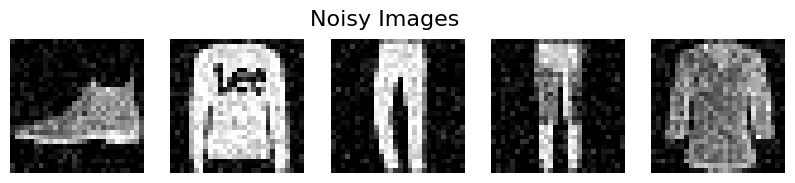

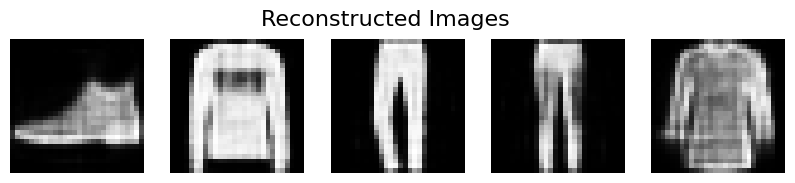

In [ ]:
# Unified visualization for image and text data
def visualization_dashboard():
    # Image visualization
    print("### IMAGE DATA VISUALIZATION ###")
    plot_images(x_test, "Original Images")
    plot_images(x_test_noisy, "Noisy Images")
    plot_images(reconstructed_images, "Reconstructed Images")


visualization_dashboard()


In [ ]:
# Generate a table comparing original, noisy, and corrected segments with error positions
original_segments = [''.join(map(str, hamming_encode(chunk))) for chunk in split_into_chunks(binary_data)]
noisy_segments = [''.join(map(str, seg)) for seg in noisy_encoded_data]
corrected_segments = [''.join(map(str, seg)) for seg in corrected_data]

# Create DataFrame for comparison
comparison_df = pd.DataFrame({
    "Original Segment": original_segments,
    "Noisy Segment": noisy_segments,
    "Corrected Segment": corrected_segments,
    "Error Position": error_positions
})

print("Original vs. Noisy vs. Corrected Data with Error Positions:\n", comparison_df)


Original vs. Noisy vs. Corrected Data with Error Positions:
     Original Segment Noisy Segment Corrected Segment  Error Position
0            0101010       0101010              0010               0
1            0000000       0000000              0000               0
2            1001100       1001100              0100               0
3            1110000       1110000              1000               0
4            1100110       1100110              0110               0
..               ...           ...               ...             ...
129          0101010       0101010              0010               0
130          0101010       0101010              0010               0
131          0000000       0000000              0000               0
132          0101010       0101010              0010               0
133          0000000       0010000              0000               3

[134 rows x 4 columns]


***CIPHER***

In [ ]:
import base64
def encrypt_data(binary_data):
    binary_bytes = binary_data.encode('utf-8')
    encrypted_data = base64.b64encode(binary_bytes).decode('utf-8')
    return encrypted_data

corrected_binary = ''.join(map(str, [bit for sublist in corrected_data for bit in sublist]))
encrypted_output = encrypt_data(corrected_binary)
print("Encrypted Output:\n", encrypted_output)



Encrypted Output:
 MDAxMDAwMDAwMTAwMTAwMDAxMTAwMTAxMDExMDExMDAwMTEwMTEwMDAxMTAxMTExMDAxMDAwMDAwMTExMDExMTAxMTAwMTAxMDExMDExMDAwMTEwMDAxMTAxMTAxMTExMDExMDExMDEwMTEwMDEwMTAwMTAwMDAwMDExMTAxMDAwMTEwMTExMTAwMTAwMDAwMDExMDExMDEwMTExMTAwMTAwMTAwMDAwMDExMDAwMTEwMTEwMTExMTAxMTAwMTAwMDExMDAxMDEwMDEwMTEwMDAwMTAwMDAwMDExMTAxMDAwMTEwMTAwMDAxMTAxMDAxMDExMTAwMTEwMDEwMDAwMDAxMTAxMDAxMDExMTAwMTEwMDEwMDAwMDAxMTAwMTAwMDExMDAxMDEwMTEwMDEwMTAxMTEwMDAwMDAxMDAwMDAwMTEwMTEwMDAxMTAwMTAxMDExMDAwMDEwMTExMDAxMDAxMTAxMTEwMDExMDEwMDEwMTEwMTExMDAxMTAwMTExMDAxMDAwMDAwMTExMDAwMDAxMTEwMDEwMDExMDExMTEwMTEwMTAxMDAxMTAwMTAxMDExMDAwMTEwMTExMDEwMDAwMTAwMDAwMDExMDExMTEwMTEwMDExMDAwMTAwMDAwMDExMDExMDEwMTEwMTAwMTAxMTAxMTEwMDExMDExMTEwMTExMDAxMDAwMTAwMDAwMDAxMDAwMDA=


In [ ]:
import base64

def decrypt_data(encrypted_data):

    decrypted_bytes = base64.b64decode(encrypted_data.encode('utf-8'))
    decrypted_data = decrypted_bytes.decode('utf-8')
    return decrypted_data


decrypted_output = decrypt_data(encrypted_output)
print("Decrypted Output:\n", decrypted_output)


Decrypted Output:
 00100000010010000110010101101100011011000110111100100000011101110110010101101100011000110110111101101101011001010010000001110100011011110010000001101101011110010010000001100011011011110110010001100101001011000010000001110100011010000110100101110011001000000110100101110011001000000110010001100101011001010111000000100000011011000110010101100001011100100110111001101001011011100110011100100000011100000111001001101111011010100110010101100011011101000010000001101111011001100010000001101101011010010110111001101111011100100010000000100000


In [ ]:
def binary_to_text(binary_data):
    # Split the binary string into groups of 8 bits (1 byte each)
    byte_chunks = [binary_data[i:i+8] for i in range(0, len(binary_data), 8)]
    # Convert each byte to its ASCII character
    text = ''.join([chr(int(byte, 2)) for byte in byte_chunks])
    return text

# Example binary data (8-bit encoding)
binary_data = "00100000010010000110010101101100011011000110111100100000011101110110010101101100011000110110111101101101011001010010000001110100011011110010000001101101011110010010000001100011011011110110010001100101001011000010000001110100011010000110100101110011001000000110100101110011001000000110010001100101011001010111000000100000011011000110010101100001011100100110111001101001011011100110011100100000011100000111001001101111011010100110010101100011011101000010000001101111011001100010000001101101011010010110111001101111011100100010000000100000"
text_output = binary_to_text(binary_data)
print("Text Output:\n", text_output)

Text Output:
  Hello welcome to my code, this is deep learning project of minor  
